# Integrate a One-Dimensional Polynomial

In [1]:
import numpy as np
import minterpy as mp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

A definite integration operation may be carried for fully-specified Minterpy polynomials. This guide explains how to carry out a definite integration on a one-dimensional polynomial interpolant in different bases.

## Motivating example

Consider the following one-dimensional damped sine function:

$$
f(x) = e^{-1.4 x} \sin{(3.5 \pi x)},\;\; x \in [-1, 1].
$$

An [estimated value](https://www.wolframalpha.com/input?i2d=true&i=Integrate%5BPower%5Be%2C-1.4x%5Dsin%5C%2840%293.5+%5Cpi+x%5C%2841%29%2C%7Bx%2C-1%2C1%7D%5D) of this integral is $0.0490183$.

Define the function in Python as follows:

In [2]:
def fun(xx):
    return np.exp(-1.4 * xx) * np.sin(3.5 * np.pi * xx)

The plot of the function is shown in the figure below:

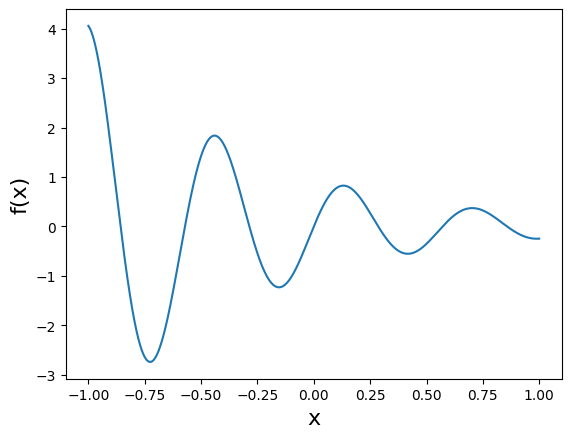

In [3]:
xx = np.linspace(-1, 1, 10000)
yy = fun(xx)

plt.plot(xx, yy)
plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16);

## Polynomial interpolation

In this guide, we are going to create a polynomial interpolant in Minterpy from scratch in four steps:

1. Define the multi-index set
2. Create the interpolation grid (of unisolvent nodes)
3. Evaluate the function on the grid
4. Create a polynomial interpolant in Lagrange basis

A polynomial interpolant of a given degree may be created using the Lagrange basis.
First, create the multi-index set:

In [33]:
mi = mp.MultiIndexSet.from_degree(spatial_dimension=1, poly_degree=30, lp_degree=1.0)

We select a high enough polynomial degree to sufficiently interpolate the function.
Then, create the interpolation grid given multi-index set:

In [34]:
grd = mp.Grid(multi_index=mi)

The grid contains unisolvent nodes on which the function should be evaluated as the coefficients of a polynomial in the Lagrange basis:

In [35]:
lag_coeffs = fun(grd.unisolvent_nodes)

Finally, a polynomial interpolant in Lagrange basis is created from the multi-index set and the set of coefficients:

In [36]:
lag_poly = mp.LagrangePolynomial(multi_index=mi, coeffs=lag_coeffs)

```{note}
In Minterpy, polynomials in the Lagrange basis cannot be directly evaluated. To evaluate an interpolating polynomial, the Newton basis is recommended.
```

## Integration over the domain $[-1, 1]$

The method `integrate_over()` integrates the polynomial over the default domain of $[-1, 1]$:

In [37]:
int_value = lag_poly.integrate_over()
int_value

0.04901827781897896

## Integration over specified bounds

The bounds of the integration may be specified. For instance, to integrate the polynomial over $[-1, 0]$:

In [38]:
lag_poly.integrate_over([-1, 0])

-0.04328650053261881

and over $[0, 1]$:

In [39]:
lag_poly.integrate_over([0, 1])

0.09230477835159588

## Integration in different bases

The integration may also be carried out on the polynomial in different bases. The same method `integrate_over()` is used.
Below is the integration in the Newton basis:

In [40]:
nwt_poly = mp.LagrangeToNewton(lag_poly)()
nwt_poly.integrate_over()

0.049018277818980896

And in the canonical basis:

In [41]:
can_poly = mp.LagrangeToCanonical(lag_poly)()
can_poly.integrate_over()

0.04901834445301771

```{warning}
The integration of polynomials in the canonical basis having a high polynomial degree is not recommended as it may suffer from a severe instability.
```